# Multiple Decision Tree with Random Forest
Algorithm Steps: 
- Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).
- Grow a decision tree from the bootstrap sample. At each node:
    - Randomly select d features without replacement.
    - Split the node using the feature that provides the best split according
- to the objective function, for instance, maximizing the information gain.
- Repeat the steps 1-2 k times.
- Aggregate the prediction by each tree to assign the class label by majority vote.

### Regular Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### Data Load & Exploration

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Coass labels: ', np.unique(y))

Coass labels:  [0 1 2]


### Preprocession

In [5]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
Target Column Vector : 
 [0 0 0]


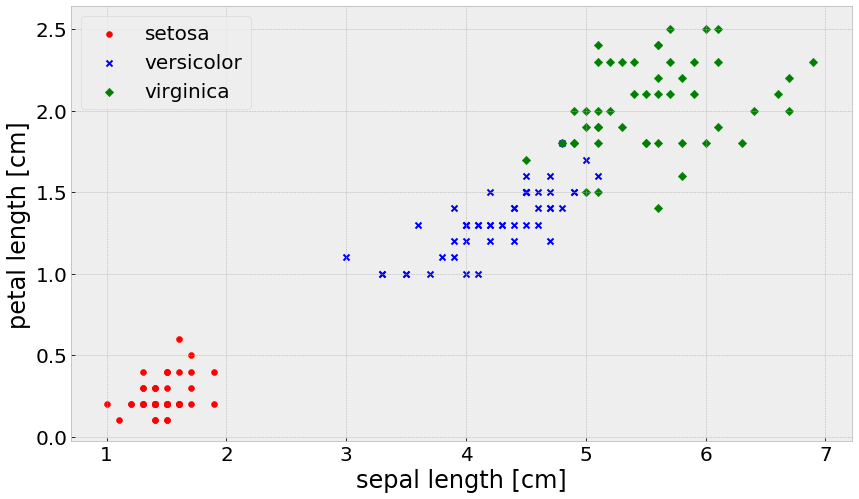

In [6]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color='green', marker='D', label = 'virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Training A Linear Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
tree = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Checking The Disission Boundry

In [12]:
from neuralbase import plot_decision_regions_combined

In [13]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

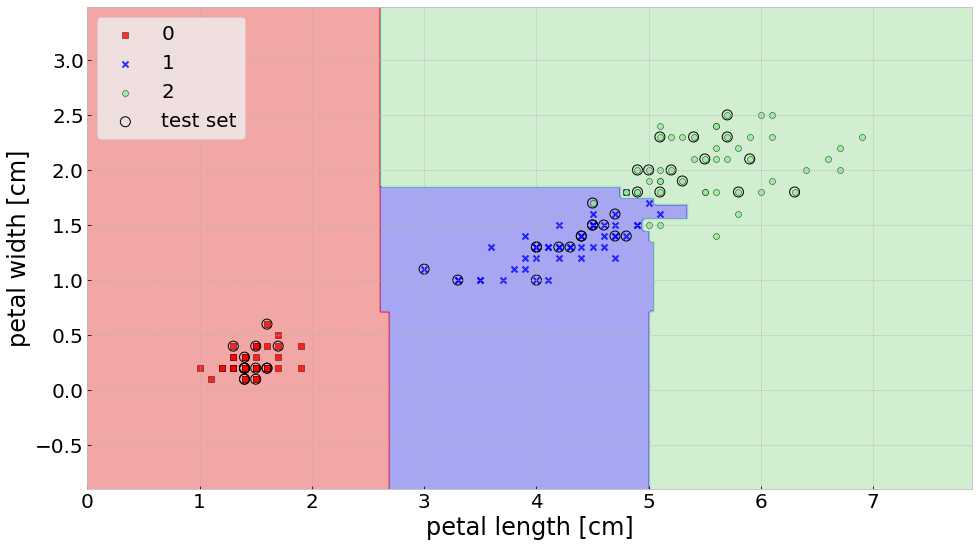

In [14]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined, targets=y_combined, 
    classifier=tree, test_idx=range(105, 150)
)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

*Note: Result Shows the Random Forest Applcation was able to seperate the multiclass region successfully*

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)